# Random Forest

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Predictions and Evaluations
8. Handle Class Imbalance
9. Hyperparameter Tuning

## 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

## 2. Load Data

In [2]:
df = pd.read_csv("Datasets/loan_data.csv")

## 3. Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()  

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# Convert int columns to catergory columns
list_factor_col = ['purpose']

for i in list_factor_col:
    df[i] = df[i].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit.policy      9578 non-null   int64   
 1   purpose            9578 non-null   category
 2   int.rate           9578 non-null   float64 
 3   installment        9578 non-null   float64 
 4   log.annual.inc     9578 non-null   float64 
 5   dti                9578 non-null   float64 
 6   fico               9578 non-null   int64   
 7   days.with.cr.line  9578 non-null   float64 
 8   revol.bal          9578 non-null   int64   
 9   revol.util         9578 non-null   float64 
 10  inq.last.6mths     9578 non-null   int64   
 11  delinq.2yrs        9578 non-null   int64   
 12  pub.rec            9578 non-null   int64   
 13  not.fully.paid     9578 non-null   int64   
dtypes: category(1), float64(6), int64(7)
memory usage: 982.6 KB


In [8]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns: 
 Index(['purpose'], dtype='object')


## 4. Data Pre-processing

In [9]:
# Remove the extra space from column names

df = df.rename(columns=lambda x: x.strip())

In [10]:
# Let's do one hot encoding for the column `purpose` as model would be expecting numeric features

df = pd.get_dummies(prefix='purpose',data=df,columns=['purpose'])

In [11]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')
Categorical columns: 
 Index([], dtype='object')


In [12]:
print(df.isna().sum())
print(df.shape)

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64
(9578, 20)


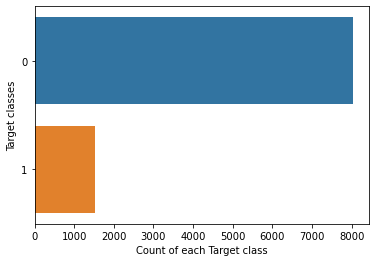

In [13]:
# Check the distribution of y variable to see if it's a case of unbalanced class

sns.countplot(y=df['not.fully.paid'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

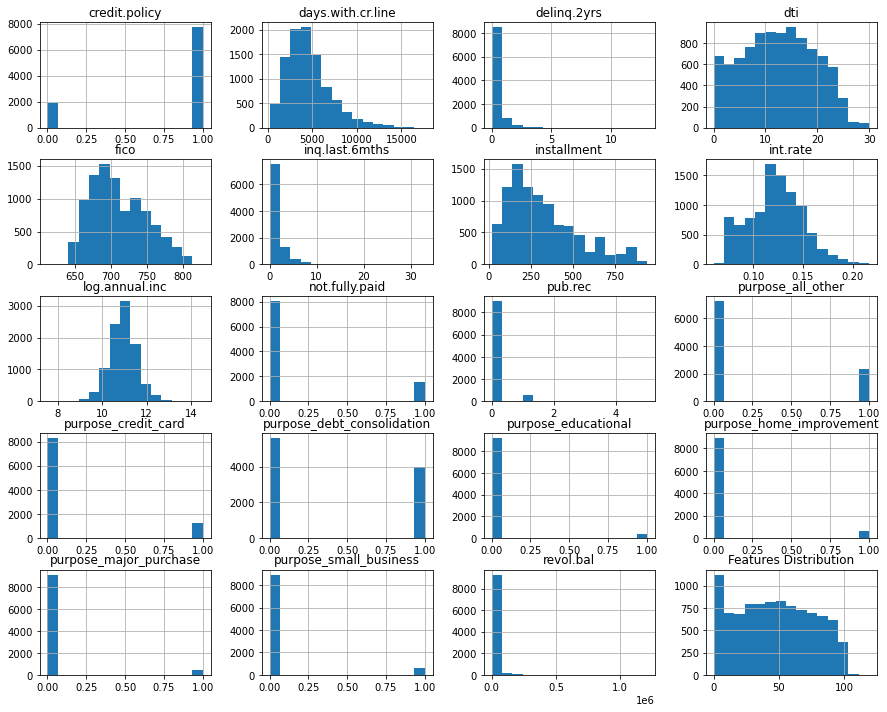

In [14]:
# Check the distribution of all the features

df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

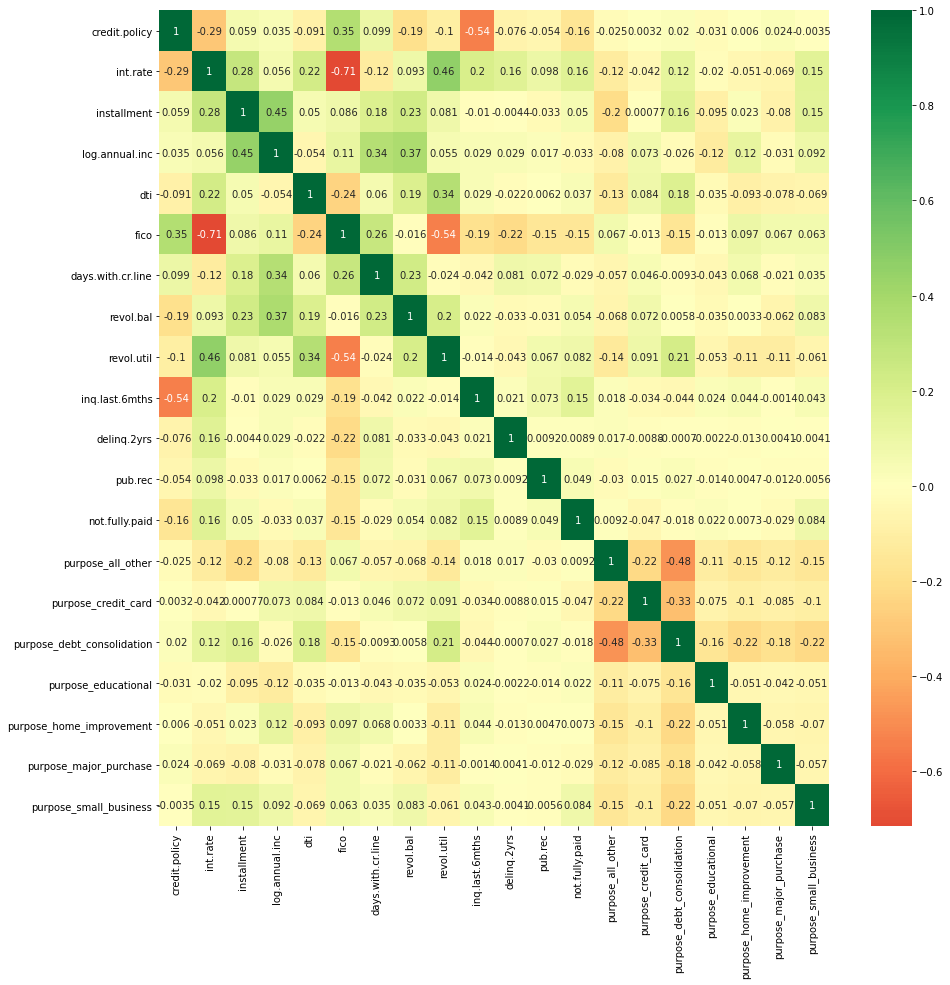

In [15]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0) 

In [16]:
# Pair Plots to know the relation between different features
# ax = sns.pairplot(df[num_col])

## 5. Model Building

In [17]:
# Train test split
X = df.drop(['not.fully.paid'], axis = 1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)
y_test.value_counts()

0    2426
1     448
Name: not.fully.paid, dtype: int64

## Random Forest

- n_estimators = 50
- max_depth    = 5

In [18]:
clf = RandomForestClassifier(n_estimators=50, max_depth= 5, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2426    0]
 [ 448    0]]

 Accuracy Score : 
  0.8441196938065414

 Classification Report : 
               precision    recall  f1-score   support

           0       0.84      1.00      0.92      2426
           1       0.00      0.00      0.00       448

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



G:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

- n_estimators = 100
- max depth = 10


In [19]:
clf = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[2421    5]
 [ 443    5]]

 Accuracy Score : 
  0.8441196938065414

 Classification Report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2426
           1       0.50      0.01      0.02       448

    accuracy                           0.84      2874
   macro avg       0.67      0.50      0.47      2874
weighted avg       0.79      0.84      0.78      2874



### Handle Class Imbalance

- over sampling

In [20]:
# Handle class imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

y_ros.value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

## Random Forest

- n_estimators = 50
- max depth = 5

In [21]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=5)

clf = RandomForestClassifier(n_estimators=50, max_depth= 5, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[1682  711]
 [ 952 1482]]

 Accuracy Score : 
  0.655479593950694

 Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      2393
           1       0.68      0.61      0.64      2434

    accuracy                           0.66      4827
   macro avg       0.66      0.66      0.65      4827
weighted avg       0.66      0.66      0.65      4827



## Random Forest

- n_estimators = 100
- max depth = 10

In [22]:
clf = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[1824  569]
 [ 483 1951]]

 Accuracy Score : 
  0.782059250051792

 Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      2393
           1       0.77      0.80      0.79      2434

    accuracy                           0.78      4827
   macro avg       0.78      0.78      0.78      4827
weighted avg       0.78      0.78      0.78      4827



## Grid Search
- https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

In [23]:
rfclassifier = RandomForestClassifier()

# defining parameter range 
param_grid = { 'max_depth'   : [10,20,40],
               'n_estimators' : [100,200,300]
             }  
  
grid = GridSearchCV(rfclassifier, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=10, n_estimators=100, score=0.775, total=   0.8s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.772, total=   0.8s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.745, total=   0.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.788, total=   0.8s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.750, total=   0.8s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.797, total=   1.6s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.758, total=   1.6s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.744, total=   1.7s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.782, total=   1.6s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [24]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

{'max_depth': 40, 'n_estimators': 200}
RandomForestClassifier(max_depth=40, n_estimators=200)


In [25]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print("Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

Confusion Matrix : 
  [[2279  114]
 [  60 2374]]

 Accuracy Score : 
  0.963952765692977

 Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2393
           1       0.95      0.98      0.96      2434

    accuracy                           0.96      4827
   macro avg       0.96      0.96      0.96      4827
weighted avg       0.96      0.96      0.96      4827

